In [27]:

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

In [58]:
BATCH_SIZE = 128
IMG_SIZE = (32, 32)
directory = "dataset/"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.1,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.1,
                                             subset='validation',
                                             seed=42)

Found 50000 files belonging to 10 classes.
Using 45000 files for training.
Found 50000 files belonging to 10 classes.
Using 5000 files for validation.


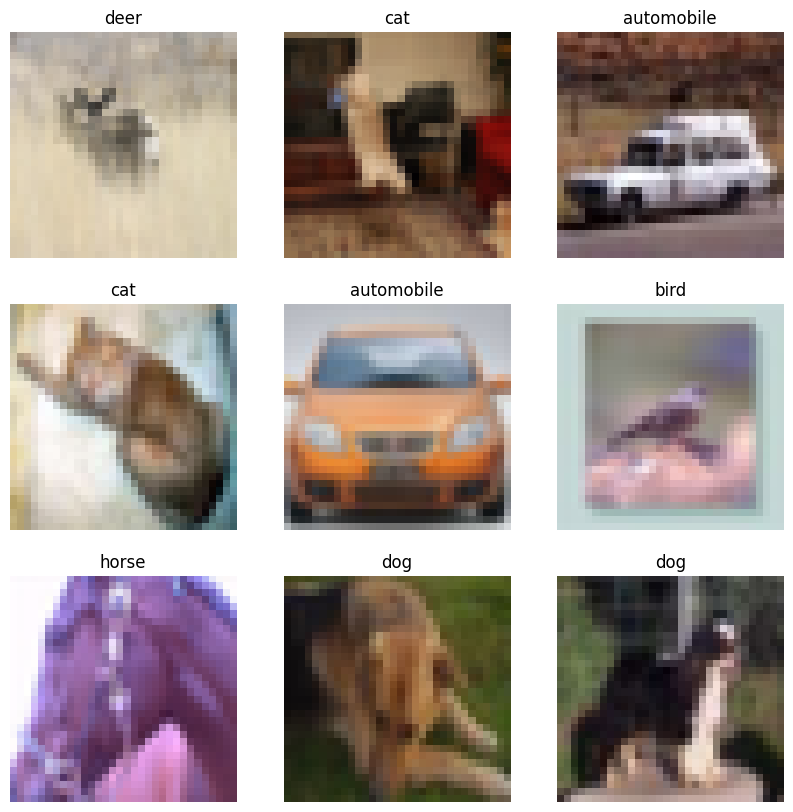

In [59]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [60]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [61]:
# UNQ_C1
# GRADED FUNCTION: data_augmenter
def data_augmenter():
    '''
    Create a Sequential model composed of 2 layers
    Returns:
        tf.keras.Sequential
    '''
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(tf.keras.layers.experimental.preprocessing.Resizing(96, 96))
#     data_augmentation.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
    data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"))
#     data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.2))
    
    return data_augmentation


In [62]:
data_augmentation = data_augmenter()

# for image, _ in train_dataset.take(1):
#     plt.figure(figsize=(10, 10))
#     first_image = image[1]
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
#         plt.imshow(augmented_image[0] / 255)
#         plt.axis('off')

In [63]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [64]:
# IMG_SHAPE = IMG_SIZE + (3,)
# IMG_SHAPE = (160, 160) + (3,)
# print(IMG_SHAPE)
IMG_SHAPE = (96,96,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
#                                                include_top=True,
                                               include_top=False,
                                               weights='imagenet')

In [65]:
base_model.summary()

Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 48, 48, 32)   864         ['input_14[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 48, 48, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 48, 48, 32)   0           ['bn_Conv1[0][0]']               
                                                                                

                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 12, 12, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 12, 12, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 12, 12, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 12, 12, 32)  128         ['block_3_project[0][0]']        
 lization)                                                                                        
          

                                                                                                  
 block_7_expand_relu (ReLU)     (None, 6, 6, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 6, 6, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 6, 6, 384)   1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_depthwise_relu (ReLU)  (None, 6, 6, 384)    0           ['block_7_depthwise_BN[0][0]']   
          

 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 6, 6, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 6, 6, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 6, 6, 576)    0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_depthwise (DepthwiseC  (None, 6, 6, 576)   5184        ['block_11_expand_relu[0][0]']   
 onv2D)   

 block_14_depthwise_relu (ReLU)  (None, 3, 3, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 3, 3, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 3, 3, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 3, 3, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
                                                                                                  
 block_15_

In [66]:
nb_layers = len(base_model.layers)
print(base_model.layers[nb_layers - 2].name)
print(base_model.layers[nb_layers - 1].name)

Conv_1_bn
out_relu


In [67]:
# image_batch, label_batch = next(iter(train_dataset))
# feature_batch = base_model(image_batch)
# print(feature_batch.shape)

In [68]:
#Shows the different label probabilities in one tensor 
label_batch

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([2, 1, 4, 9, 5, 8, 7, 9, 9, 3])>

In [69]:
# UNQ_C2
# GRADED FUNCTION
def alpaca_model(image_shape=IMG_SIZE, data_augmentation=data_augmenter()):
    ''' Define a tf.keras model for binary classification out of the MobileNetV2 model
    Arguments:
        image_shape -- Image width and height
        data_augmentation -- data augmentation function
    Returns:
    Returns:
        tf.keras.model
    '''
    
    
    input_shape = image_shape + (3,)
    
    ### START CODE HERE
    
    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False, # <== Important!!!!
                                                   weights='imagenet') # From imageNet
    
    # freeze the base model by making it non trainable
    base_model.trainable = False 

    # create the input layer (Same as the imageNetv2 input size)
    inputs = tf.keras.Input(shape=input_shape) 
    
    # apply data augmentation to the inputs
    x = data_augmentation(inputs)
    
    # data preprocessing using the same weights the model was trained on
    x = preprocess_input(x) 
    
    # set training to False to avoid keeping track of statistics in the batch norm layer
    x = base_model(x, training=False) 
    
    # add the new Binary classification layers
    # use global avg pooling to summarize the info in each channel
    x = tfl.GlobalAveragePooling2D()(x) 
    # include dropout with probability of 0.2 to avoid overfitting
    x = tfl.Dropout(0.2)(x)
        
    # use a prediction layer with one neuron (as a binary classifier only needs one)
#     outputs = tfl.Dense(1)(x)
    outputs = tfl.Dense(10, activation='softmax')(x)
    ### END CODE HERE
    
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [70]:
model = alpaca_model(IMG_SIZE, data_augmentation)

In [71]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [72]:
initial_epochs = 5
if tf.config.list_physical_devices('GPU'):
    print('Training on GPU...')
    with tf.device('/GPU:0'):
        history = model2.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)
else:
    print('Training on CPU...')
    history = model2.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)
    
# history = model2.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)

Training on GPU...
Epoch 1/5
352/352 [==============================] - 58s 157ms/step - loss: 1.1289 - accuracy: 0.6072 - val_loss: 1.0688 - val_accuracy: 0.6222
Epoch 2/5
352/352 [==============================] - 52s 147ms/step - loss: 1.0742 - accuracy: 0.6248 - val_loss: 1.0540 - val_accuracy: 0.6244
Epoch 3/5
352/352 [==============================] - 52s 146ms/step - loss: 1.0454 - accuracy: 0.6354 - val_loss: 1.0308 - val_accuracy: 0.6324
Epoch 4/5
352/352 [==============================] - 53s 149ms/step - loss: 1.0206 - accuracy: 0.6452 - val_loss: 1.0461 - val_accuracy: 0.6280
Epoch 5/5
352/352 [==============================] - 53s 151ms/step - loss: 1.0027 - accuracy: 0.6507 - val_loss: 1.0317 - val_accuracy: 0.6310


In [73]:
# base_learning_rate = 0.01
base_model = model2.layers[4]
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 120

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1 * base_learning_rate)
metrics = ['accuracy']

model2.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=metrics)


Number of layers in the base model:  154


In [74]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs
# total_epochs =  fine_tune_epochs
history_fine = model2.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 5/10
352/352 [==============================] - 51s 133ms/step - loss: 1.0395 - accuracy: 0.6386 - val_loss: 1.0516 - val_accuracy: 0.6214
Epoch 6/10
352/352 [==============================] - 48s 135ms/step - loss: 1.0111 - accuracy: 0.6503 - val_loss: 0.9873 - val_accuracy: 0.6492
Epoch 7/10
352/352 [==============================] - 49s 137ms/step - loss: 0.9895 - accuracy: 0.6582 - val_loss: 0.9790 - val_accuracy: 0.6550
Epoch 8/10
352/352 [==============================] - 50s 141ms/step - loss: 0.9560 - accuracy: 0.6686 - val_loss: 0.9753 - val_accuracy: 0.6528
Epoch 9/10
352/352 [==============================] - 52s 146ms/step - loss: 0.9404 - accuracy: 0.6735 - val_loss: 0.9598 - val_accuracy: 0.6608
Epoch 10/10
352/352 [==============================] - 50s 142ms/step - loss: 0.9135 - accuracy: 0.6817 - val_loss: 1.0002 - val_accuracy: 0.6526
